In [1]:
%load_ext autoreload
%autoreload 2

# Picturing vectors in three-dimensional space

## 3D Drawing in Python

In [2]:
from draw3d import *

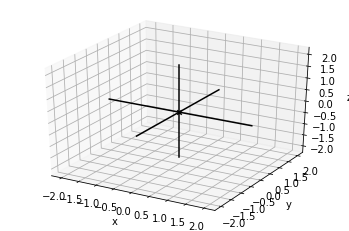

In [3]:
draw3d()

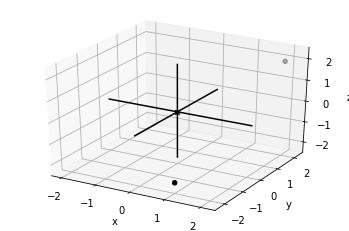

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

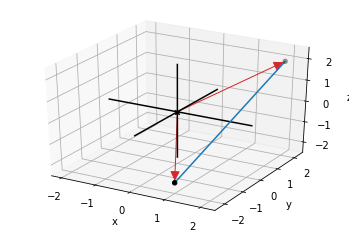

In [5]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

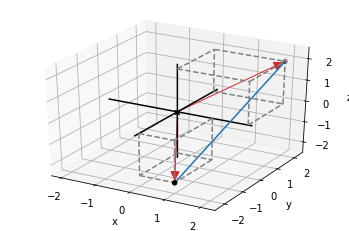

In [6]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

**Exercise:** Draw the 3D arrow and point representing the coordinates $(-1,-2,2)$, as well as the dashed box that makes the arrow look 3D.  Do this drawing by hand as practice, but from now on we’ll use Python to draw for us.

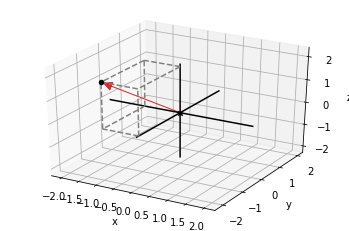

In [7]:
v = (-1,-2,2)

draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

**Mini project:** There are eight 3D vectors that have every coordinate equal to $+1$ or $-1$.  For instance, $(1,-1,1)$ is one of them.  Plot all of these eight vectors as points.  Then, figure out how to connect them with line segments (using `Segment3D` objects) to form the outline of a cube.  Hint: you’ll need 12 segments in total.

In [8]:
s = [1,-1]

for i,x in enumerate(s):
    print(f'x: iter: {i}, value: {x}')
    for j,y in enumerate(s):
        print(f'y: iter: {j}, value: {y}')
        for k,z in enumerate(s):
            print(f'z: iter: {k}, value: {z}')


x: iter: 0, value: 1
y: iter: 0, value: 1
z: iter: 0, value: 1
z: iter: 1, value: -1
y: iter: 1, value: -1
z: iter: 0, value: 1
z: iter: 1, value: -1
x: iter: 1, value: -1
y: iter: 0, value: 1
z: iter: 0, value: 1
z: iter: 1, value: -1
y: iter: 1, value: -1
z: iter: 0, value: 1
z: iter: 1, value: -1


In [9]:
pm1 = [1,-1]
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
vertices

[(1, 1, 1),
 (1, 1, -1),
 (1, -1, 1),
 (1, -1, -1),
 (-1, 1, 1),
 (-1, 1, -1),
 (-1, -1, 1),
 (-1, -1, -1)]

In [10]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1]
edges

[((-1, 1, 1), (1, 1, 1)),
 ((-1, 1, -1), (1, 1, -1)),
 ((-1, -1, 1), (1, -1, 1)),
 ((-1, -1, -1), (1, -1, -1))]

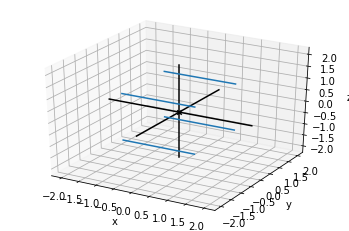

In [11]:
draw3d(
    *[Segment3D(*edge) for edge in edges]
)

In [12]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

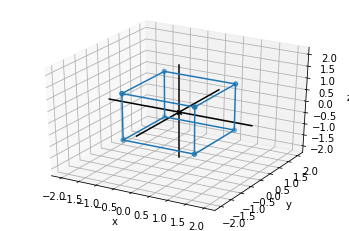

In [13]:
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

# Vector arithmetic in 3D

## Adding 3D vectors

In [14]:
#list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))
list(zip((1,1,3),(2,4,-4),(4,2,-2)))
(1,1,3),(2,4,-4),(4,2,-2)

((1, 1, 3), (2, 4, -4), (4, 2, -2))

In [15]:
def add(*vectors):
    coords = list(zip(*vectors))
    return [sum(coord) for coord in coords] 


add((1,1,3),(2,4,-4),(4,2,-2))

[7, 7, -3]

In [16]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))    

In [17]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

In [18]:
l = [(1,1,3),(2,4,-4),(4,2,-2)]

add(*l)

(7, 7, -3)

## Computing lengths and distances

In [19]:
from math import sqrt

In [20]:
def length(vector):
    return sqrt(sum([component ** 2 for component in vector]))

In [21]:
length((3,4,12))

13.0

## Exercises

**Exercise:** Draw $(4,0,3)$ and $(-1,0,1)$ as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D.  What is their vector sum?

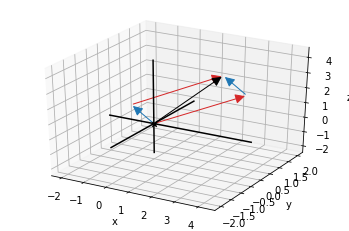

In [22]:
u = (4,0,3)
v = (-1,0,1)

draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue),
    Arrow3D(add(u,v), u, color=blue),
    Arrow3D(add(u,v), v, color=red),
    Arrow3D(add(u,v), color=black),
    )

**Exercise:** Suppose we set `vectors1=[(1,2,3,4,5), (6,7,8,9,10)]` and `vectors2=[(1,2), (3,4), (5,6)]`.  Without evaluating in Python, what are the results of `len(zip(*vectors1))` and `len(zip(*vectors2))`?

In [23]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]
vectors2=[(1,2), (3,4), (5,6)]

In [24]:
len(list(zip(*vectors1)))

5

In [25]:
len(list(zip(*vectors2)))

2

**Mini project:** The comprehension below creates a list of 24 Python vectors
```
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
```
What is the sum of the 24 vectors?  Draw all 24 of them tip-to-tail as Arrow3D objects.

In [26]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
vs_sum = add(*vs)
vs_sum

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


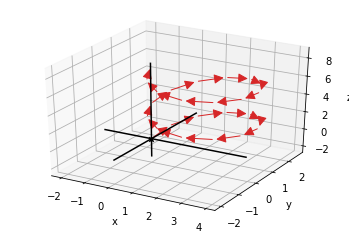

In [27]:
current_sum = (0,0,0)
arrows = []

for v in vs:
    next_sum = add(current_sum, v)
    arrows.append(Arrow3D(next_sum, current_sum))
    current_sum = next_sum

print(current_sum)
draw3d(*arrows)

**Exercise:** Write a function `scale(scalar,vector)` that returns the input scalar times the input vector.  Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.

In [28]:
def scale(scalar, vector):
    return tuple([scalar * component for component in vector])


In [29]:
scale(5,(3,4,5))

(15, 20, 25)

**Mini project:** The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number.  Find a different triple of whole numbers that define coordinates of a vector with whole number length.

In [30]:
length((3,4,12))

13.0

In [31]:
def vectors_with_whole_number_length():
    for i in range(0,100):
        for j in range(0,100):
            for k in range(0,100):
                if length((i,j,k)).is_integer():
                    yield (i,j,k)


In [32]:
l = list(vectors_with_whole_number_length())

In [33]:
len(l)

5485

In [34]:
l[-1]

(99, 90, 70)

In [35]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)

In [36]:
l = list(vectors_with_whole_number_length())

In [37]:
len(l)

869

**Exercise:** Find a vector in the same direction as $(-1,-1,2)$ but which has length 1.  Hint: find the appropriate scalar to multiply the original vector to change its length appropriately.

In [38]:
length((-1,-1,2))


2.449489742783178

In [39]:
s = 1/length((-1,-1,2))
scale(s,(-1,-1,2))
(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)


(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [40]:
length(scale(s,(-1,-1,2)))

1.0

**Exercise:** Let u = (1,-1,-1) and v = (0,0,2). What is the result of u + ½ * (v - u)?

In [41]:
u = (1,-1,-1)
v = (0,0,2)

In [42]:
u_ = scale(-1,u)
u_

(-1, 1, 1)

In [43]:
add(u, scale(1/2, add(v, u_)))

(0.5, -0.5, 0.5)

# The dot product: measuring alignment of vectors

## Computing the dot product

In [44]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

In [45]:
u = (1,0)
v = (0,2)

In [46]:
list(zip(u,v))

[(1, 0), (0, 2)]

In [47]:
dot((1,0),(0,2))

0

In [48]:
dot((0,3,0),(0,0,-5))

0

In [49]:
dot((3,4),(2,3))

18

In [50]:
dot(scale(2,(3,4)),(2,3))

36

In [51]:
length((5,0)) * length((3,4))

25.0

In [52]:
dot((5,0),(4,3))

20

## Measuring angles with the dot product

In [88]:
from math import sin, cos, pi, acos

In [54]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [55]:
def angle_between(v1,v2):
    return acos(
                dot(v1,v2) /
                (length(v1) * length(v2))
            )

**Mini project:** Find a vector $\vec{u}$ of length 3 and a vector $\vec{v}$ of length 7, such that $\vec{u} \cdot \vec{v} = 21$.  Find another pair of vectors $\vec{u}$ and $\vec{v}$ such that $\vec{u} \cdot \vec{v} = -21$.  Finally, find three more pairs of vectors of respective lengths 3 and 7 and show that all of their lengths lie between -21 and 21.

In [56]:
dot((3,0), (7,0))

21

In [376]:
dot((-3,0), (7,0))

-21

In [62]:
from vectors import to_cartesian
from random import random
from math import pi

def random_vector_of_length(l):
    return to_cartesian((l, 2*pi*random()))

pairs = [(random_vector_of_length(3), random_vector_of_length(7)) for i in range(0,3)]

for u,v in pairs:
    print(f'u={u}, v={v}')
    print(f'length(u) = {length(u)}, length(v) = {length(v)}, dot(u,v) = {dot(u,v)}')



u=(-0.6101513454623058, 2.9372972841764824), v=(5.448161255417419, 4.395172230410146)
length(u) = 3.0, length(v) = 7.0, dot(u,v) = 9.585724535583072
u=(0.6775565529972002, 2.922484750600172), v=(-4.572347875960463, 5.300342904114775)
length(u) = 2.9999999999999996, length(v) = 7.0, dot(u,v) = 12.392147044287418
u=(2.2094385392665314, 2.0293795458720325), v=(0.34959189304689864, 6.991264943364389)
length(u) = 3.0, length(v) = 6.999999999999999, dot(u,v) = 14.960331877348846


**Exercise:** Let $\vec{u}$ and $\vec{v}$ be vectors, with $|\vec{u}| = 3.61$ and $|\vec{v}| = 1.44$.  If the angle between $\vec{u}$ and $\vec{v}$ is 101.3 degrees, what is $\vec{u} ∙ \vec{v}$?

In [74]:
u = 3.61
v = 1.44
tetha = 101.3
uv = u * v * cos(tetha * pi/180)
uv

-1.0186064362303022

**Mini Project:** Find the angle between $(3,4)$ and $(4,3)$ by converting them to polar coordinates and taking the difference of the angles.  

In [76]:
from vectors import to_polar 

In [85]:
_,alpha = to_polar((4,3))
_,beta = to_polar((3,4))

beta - alpha

0.2837941092083278

In [89]:
angle_between((4,3),(3,4))

0.283794109208328

In [96]:
dot((1,1,0),(-0.9,1,0))

0.09999999999999998

# The cross product: measuring oriented area

## Computing the cross product of 3D vectors

In [97]:
def cross(u, v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

In [101]:
cross((0,0,1),(1,2,3))

(-2, 1, 0)

In [102]:
cross((0,0,1),(-1,-1,0))

(1, -1, 0)

# Rendering a 3D object in 2D

## Defining a 3D object with vectors

In [103]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [104]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [112]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [113]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [114]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [115]:
blues = matplotlib.cm.get_cmap('Blues')

In [116]:
def unit(v):
    return scale(1./length(v), v)

In [120]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [124]:
from vectors import *
from draw2d import *

In [125]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)
#1For each face, compute a vector of length 1 perpendicular to it.
#2Only proceed if the z-component of this vector is positive, or in other words if it points toward the viewer.
#3The larger the dot product between the normal vector and the light source vector, the less shading.

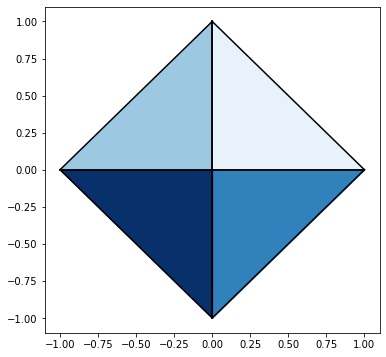

In [128]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

In [129]:
def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

In [157]:
u = (1,0,0)
v = (0,1,0)

tuple([(component_v1 - component_v2) for (component_v1, component_v2) in zip(u,v)])

(1, -1, 0)

In [161]:
right = (1,1,1)
up = (-1,-1,1)

v = (5,5,5)

In [162]:
component(v, right)

8.660254037844387

In [163]:
component(v, up)

-2.886751345948129

In [165]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

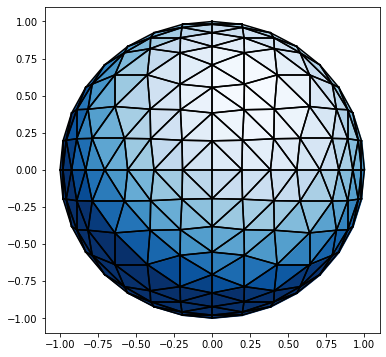

In [166]:
render(sphere_approx(3), lines='k')

**Mini project:** Find pairs of vectors defining each of the 12 edges of the octahedron, and draw all of the edges in Python.

In [167]:
octahedron

[[(1, 0, 0), (0, 1, 0), (0, 0, 1)],
 [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
 [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
 [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
 [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
 [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]]

In [247]:
edges = []
for face in octahedron:
    for i in range(0, len(face)):
        edge = (face[i], face[(i+1)%len(face)])
        edges.append(Segment3D(*edge))

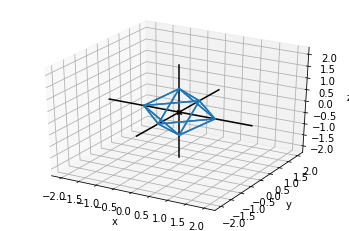

In [248]:
draw3d(*edges)